<a href="https://colab.research.google.com/github/abhilb/mycolab/blob/main/Sign_language_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sign Language Classifier

In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [3]:
#@title Download the dataset
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download ardamavi/27-class-sign-language-dataset
! unzip /content/27-class-sign-language-dataset.zip

In [48]:
#@title Load the dataset
X = np.load('X.npy')
y = np.load('Y.npy')
print(f"Shape of X: {X.shape} and Shape of y: {y.shape}")

Shape of X: (22801, 128, 128, 3) and Shape of y: (22801, 1)


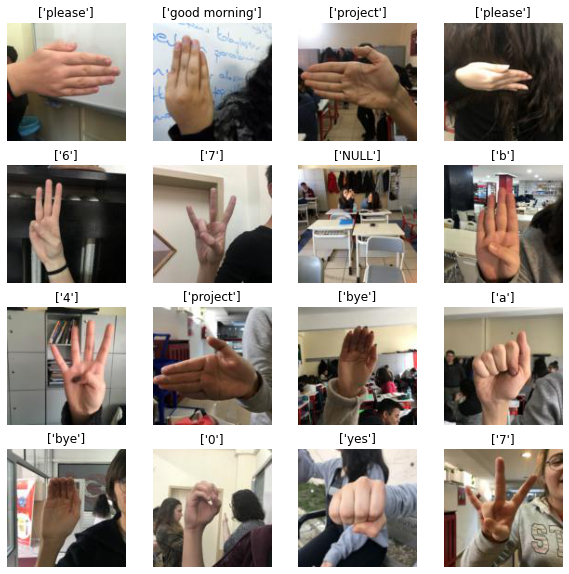

In [45]:
#@title Display some of the images from the dataset
f, axes = plt.subplots(4, 4, figsize=(10, 10))
for ax in axes.flatten():
  idx = np.random.randint(0, 22801)
  img = X[idx]
  label = y[idx]
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(label)
plt.show()

In [47]:
#@title Labels in the dataset
', '.join(list(np.unique(y)))

'0, 1, 2, 3, 4, 5, 6, 7, 8, 9, NULL, a, b, bye, c, d, e, good, good morning, hello, little bit, no, pardon, please, project, whats up, yes'

In [41]:
enc = OrdinalEncoder()
labels = enc.fit_transform(y)

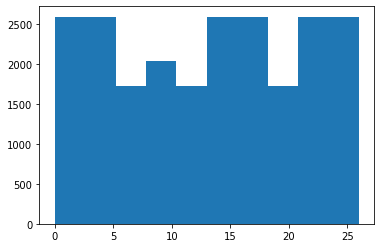

In [42]:
plt.hist(labels)
plt.show()

In [44]:
enc.categories_

[array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'NULL', 'a', 'b',
        'bye', 'c', 'd', 'e', 'good', 'good morning', 'hello',
        'little bit', 'no', 'pardon', 'please', 'project', 'whats up',
        'yes'], dtype='<U17')]